<br><br><br><br><br><h1 style="font-size:4em;color:#2467C0">Week 1: Soccer Data Analysis</h1><br><br><br><br><br>

## Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np

## Download from : https://www.kaggle.com/hugomathien/soccer
## Extract the zip file
## Read the dataset using the commands below

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

## <br><br><h1 style="font-size:2em;color:#2467C0">Statistics: Let us look how the data looks</h1><br><br><br><br><br>

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## <br><br><h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1><br><br><br><br><br>

In [5]:
#is any row NULL ?
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [6]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [7]:
# Fix it

# Take initial # of rows
rows = df.shape[0]

# Drop the NULL rows
df = df.dropna()

In [8]:
#Check if all NULLS are gone ?

df.isnull().any().any(), df.shape

(False, (180354, 42))

In [9]:
#How many rows with NULL values?


rows - df.shape[0]

3624

In [10]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

## <br><br><h1 style="font-size:2em;color:#2467C0">Predicting: 'overall_rating' of a player</h1><br><br><br><br><br>

### Let's take a look at top few rows

In [11]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
56363,56364,208574,281012,2013-02-15 00:00:00,65.0,74.0,left,medium,medium,65.0,...,64.0,66.0,34.0,43.0,42.0,12.0,13.0,11.0,11.0,12.0
54402,54403,173132,181921,2014-12-05 00:00:00,69.0,69.0,right,high,low,29.0,...,50.0,73.0,22.0,22.0,23.0,5.0,10.0,7.0,5.0,10.0
131841,131842,172470,34763,2014-02-14 00:00:00,69.0,72.0,right,medium,medium,41.0,...,72.0,68.0,25.0,29.0,25.0,15.0,9.0,14.0,10.0,12.0
52356,52357,199666,199916,2014-10-10 00:00:00,70.0,76.0,right,medium,high,56.0,...,69.0,64.0,60.0,72.0,72.0,9.0,14.0,11.0,7.0,12.0
83110,83111,204731,280906,2011-08-30 00:00:00,56.0,61.0,left,high,medium,51.0,...,43.0,39.0,55.0,67.0,67.0,14.0,8.0,12.0,14.0,7.0


In [12]:
# Let us plot first few lines (ignore the first column - it is the index)

df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
56363,66.0,65.0
54402,73.0,69.0
131841,68.0,69.0
52356,64.0,70.0
83110,39.0,56.0
57990,55.0,68.0
26042,69.0,72.0
161703,36.0,64.0
126331,53.0,59.0
154204,68.0,73.0


## Check if 'penalties' is correlated to 'overall_rating'

In [13]:
# are these correlated ?

df['overall_rating'].corr(df['penalties'])

0.39271510791118824

## Create a list of potentialFeatures that you want to measure correlation with

In [14]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [15]:
# check how the features are correlated with the overall ratings

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))


acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


#### Notice: ball_control and shot_power seem to have higher correlation with ratings


## <br><br><h1 style="font-size:2em;color:#2467C0">Data Visualization:</h1><br><br><br><br><br>

In [16]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [17]:
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [18]:
len(cols), len(correlations)

(34, 34)

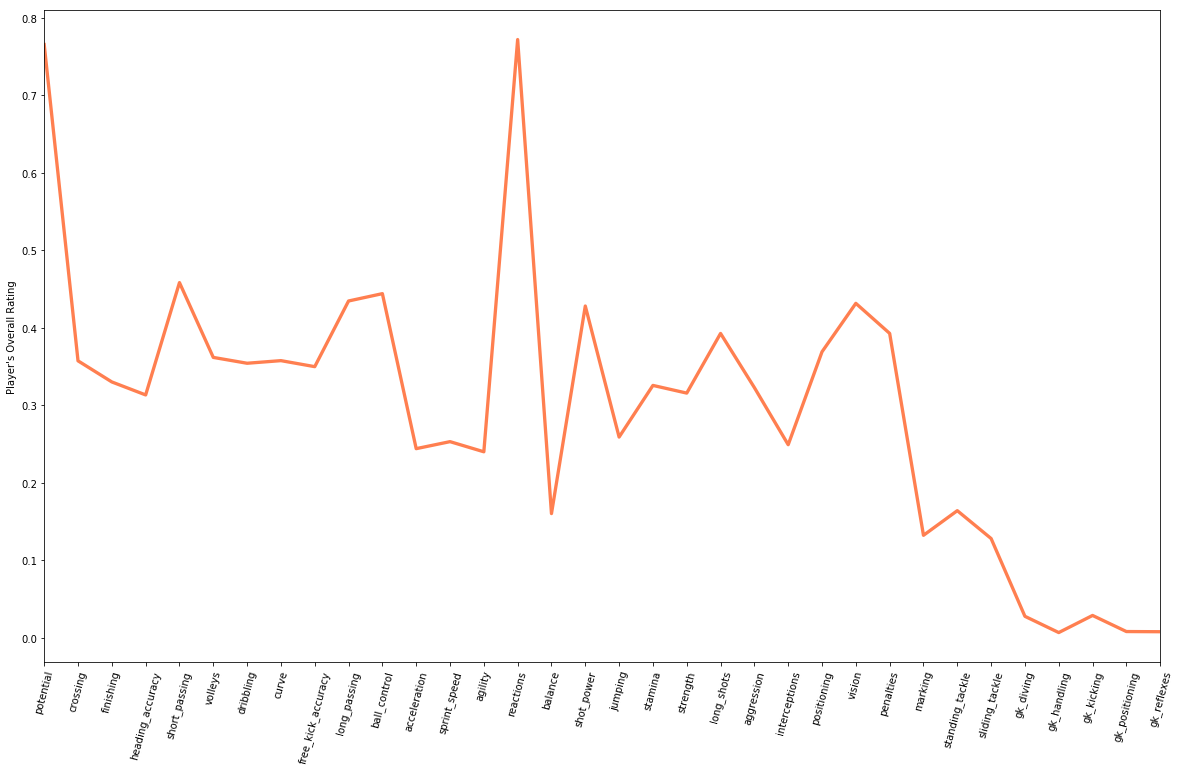

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

color='coral'
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.ylabel('Player\'s Overall Rating')

ax = df2.correlation.plot(linewidth=3.3, color=color)
ax.set_xticks(df2.index)
ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)
plt.show()

## <br><br><h1 style="font-size:1.5em;color:#DA70D6">Suppose you have to predict a player's overall rating. <br><br> Which 5 player attributes would you ask for ?</h1><br><br><br><br><br>

## <br><br><h1 style="font-size:2em;color:#2467C0">Clustering Players into Similar Groups:</h1><br><br><br><br><br>

## <br><br><h1 style="font-size:2em;color:#2467C0">Select features on which to group players:</h1><br><br><br><br><br>

In [20]:
import random
select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [21]:
df_select = df[select5features].copy(deep=True)

In [22]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
56363,11.0,74.0,34.0,31.0,43.0
54402,7.0,69.0,22.0,29.0,22.0
131841,14.0,72.0,25.0,29.0,29.0
52356,11.0,76.0,60.0,71.0,72.0
83110,12.0,61.0,55.0,61.0,67.0


## <br><br><h1 style="font-size:2em;color:#2467C0">Perform KMeans Clustering:</h1><br><br><br><br><br>

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = scale(df_select)
noOfClusters = 4
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [24]:
from customplot import *
P = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)

In [25]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    23783
1    50214
2    55905
3    50452
dtype: int64

## <br><br><h1 style="font-size:2em;color:#2467C0">Plot cluster centers of each group:</h1><br><br><br><br><br>

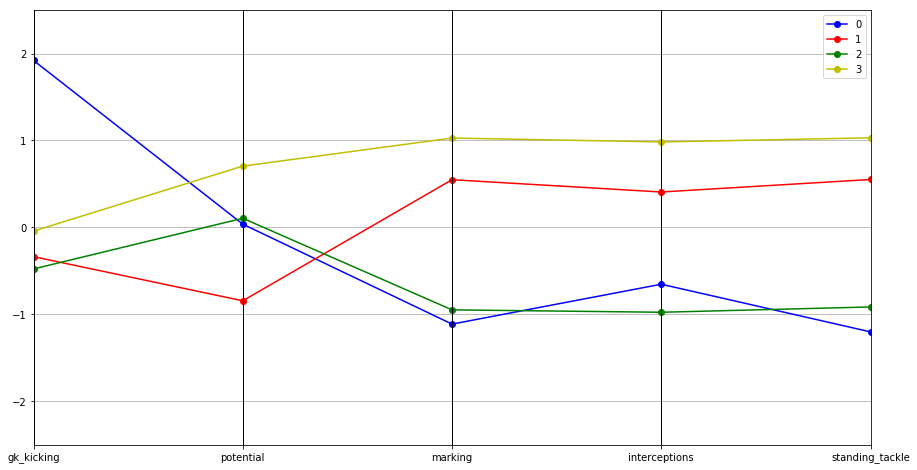

In [26]:
%matplotlib inline
parallel_plot(P)

#### Group 0 and 2 are kind of similar except in potential
#### Group 1 and 3 are very similar to each other except in gk_kicking
